In [7]:
from email.contentmanager import raw_data_manager
from pydoc import classname
import numpy as np
import pandas as pd

filename = 'heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(filename)
raw_data = df.values
#hola
cols = range(0, 13)

X = raw_data[:, cols]

attribute_names = np.asarray(df.columns[cols])
attribute_dic = dict(zip(attribute_names, range(len(attribute_names))))

# Our class labels is DEATH 
classLabels = raw_data[:, -1]
classNames = ["ALIVE", "DEAD"]
classDic = dict(zip(classNames, range(len(classNames))))
y = np.array([classDic[i] for i in classNames])

N, M = X.shape
C = len(classNames)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 299 but corresponding boolean dimension is 2

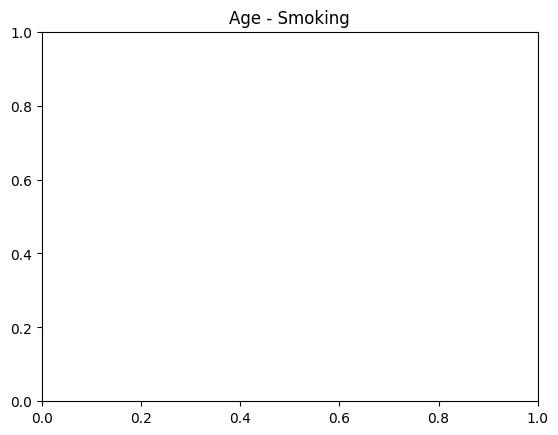

In [8]:
import matplotlib.pyplot as plt

i = attribute_dic["age"]
j = attribute_dic["smoking"]

f = plt.figure()
plt.title('Age - Smoking')

for c in range(C):
    class_mask = y==c
    plt.plot(X[class_mask,i], X[class_mask,j], 'o',alpha=.3)

plt.legend(classNames)
plt.xlabel(attribute_names[i])
plt.ylabel(attribute_names[j])

# Output result to screen
plt.show()

#testing


